### Nom et Prénom: BOUTALBI Mohammed Iliass 

### Partie 1 : Importation des données et configuration initiale

In [92]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime
import warnings
warnings.filterwarnings("ignore")

# Configuration de l'affichage des données
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Chargement des données
data = pd.read_csv('HomeC.csv')

# Exploration rapide des données
print(data.info())
print(data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  int64  
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Cellar [kW]          503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

### Partie 2 : Prétraitement des données

In [93]:
# Conversion et réindexation de la colonne 'time'
data['time'] = pd.to_datetime(data['time'], unit='s')
data['time'] = pd.date_range('2016-01-01 05:00', periods=len(data), freq='min')

data.set_index('time', inplace=True, drop=False)

print(data.head(2))

# Vérification des valeurs manquantes
print("Données manquantes par colonne :\n", data.isnull().sum())

# Remplissage des valeurs manquantes
data.fillna(method='ffill', inplace=True)  # Utilisation de la méthode 'forward fill'

# Exploration des valeurs uniques pour certaines colonnes
print("Valeurs uniques de la colonne 'summary':", data['summary'].unique())
print("Valeurs uniques de la colonne 'cloudCover':", data['cloudCover'].unique())

# Nettoyage des noms de colonnes
data.columns = [col.replace(' [kW]', '') for col in data.columns]

# Création de nouvelles colonnes agrégées
data['Furnace'] = data[['Furnace 1', 'Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].sum(axis=1)

# Suppression des colonnes inutiles
cols_to_drop = ['Furnace 1', 'Furnace 2', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'icon', 'summary']
data.drop(columns=cols_to_drop, inplace=True)

# Nettoyage et conversion de la colonne 'cloudCover'
data['cloudCover'] = pd.to_numeric(data['cloudCover'], errors='coerce')  # Conversion en numérique
data['cloudCover'].fillna(method='ffill', inplace=True)  # Remplissage des NaN restants

# Réorganisation des colonnes
cols = ['time'] + [col for col in data.columns if col != 'time']
data = data[cols]
print(data.head(2))


                                   time  use [kW]  gen [kW]  \
time                                                          
2016-01-01 05:00:00 2016-01-01 05:00:00  0.932833  0.003483   
2016-01-01 05:01:00 2016-01-01 05:01:00  0.934333  0.003467   

                     House overall [kW]  Dishwasher [kW]  Furnace 1 [kW]  \
time                                                                       
2016-01-01 05:00:00            0.932833         0.000033        0.020700   
2016-01-01 05:01:00            0.934333         0.000000        0.020717   

                     Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
time                                                                 
2016-01-01 05:00:00        0.061917          0.442633      0.12415   
2016-01-01 05:01:00        0.063817          0.444067      0.12400   

                     Cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
time                                                                  
2016-01-01 05:00:00

### Partie 3 : Corrélations liées à l'énergie

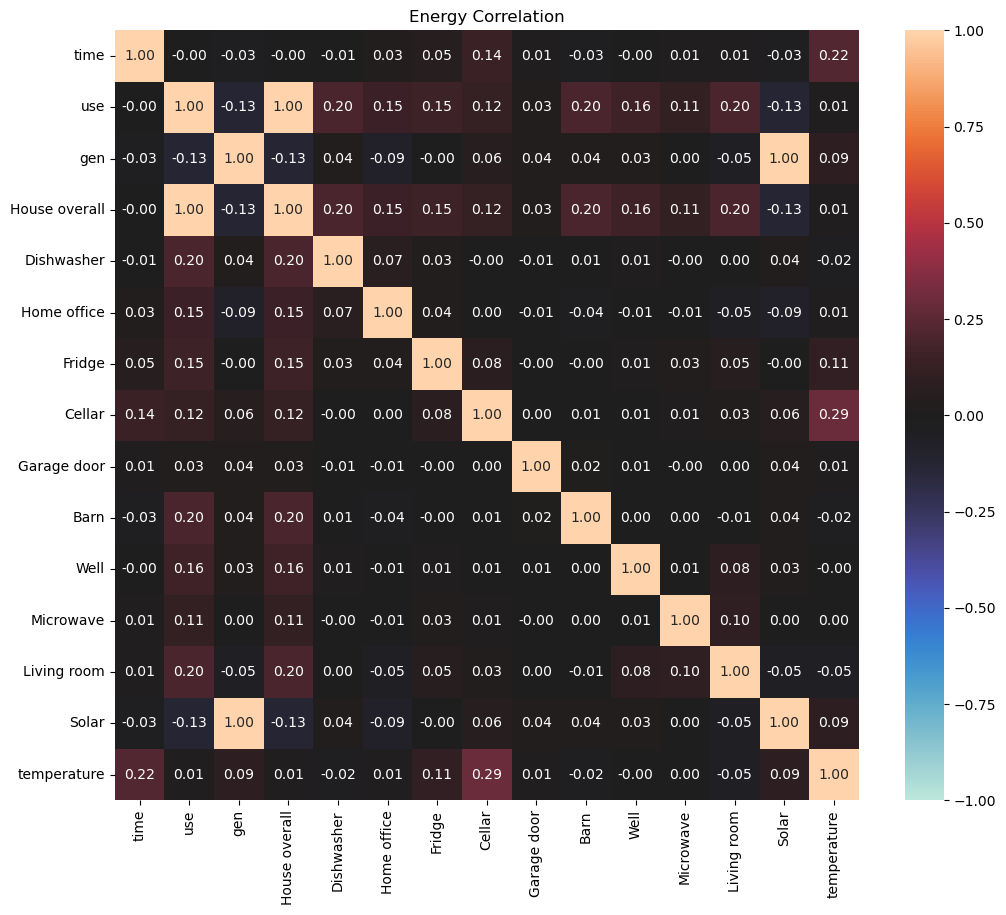

In [94]:
#Carte de chaleur des corrélations
energy_columns = data.columns[0:15].tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(data[energy_columns].corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Energy Correlation', fontsize=12)
plt.show()

In [95]:
print(data.columns)  # Liste des colonnes disponibles


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')


True
True


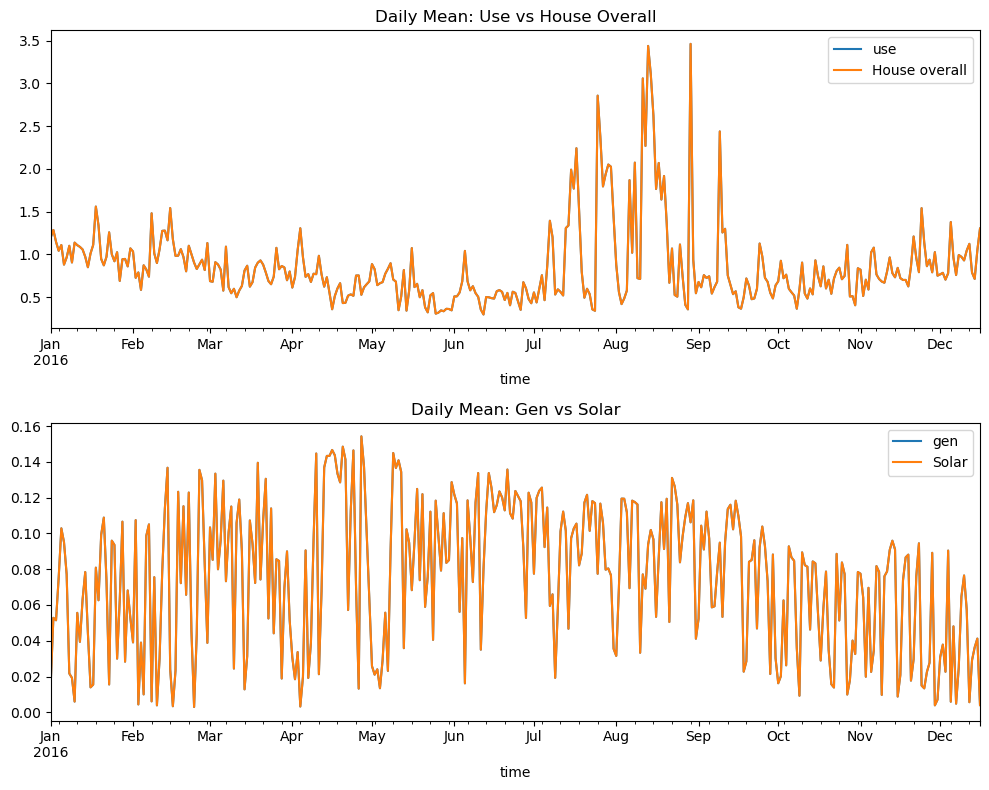

In [96]:



# Comparaison entre colonnes similaires
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))

# Visualisation des moyennes journalières
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
data[['use', 'House overall']].resample('D').mean().plot(ax=axes[0])
axes[0].set_title('Daily Mean: Use vs House Overall')
data[['gen', 'Solar']].resample('D').mean().plot(ax=axes[1])
axes[1].set_title('Daily Mean: Gen vs Solar')
plt.tight_layout()
plt.show()

In [97]:
data.drop(['use', 'gen'], axis=1, inplace=True)

### Partie 4 : Corrélations météorologiques

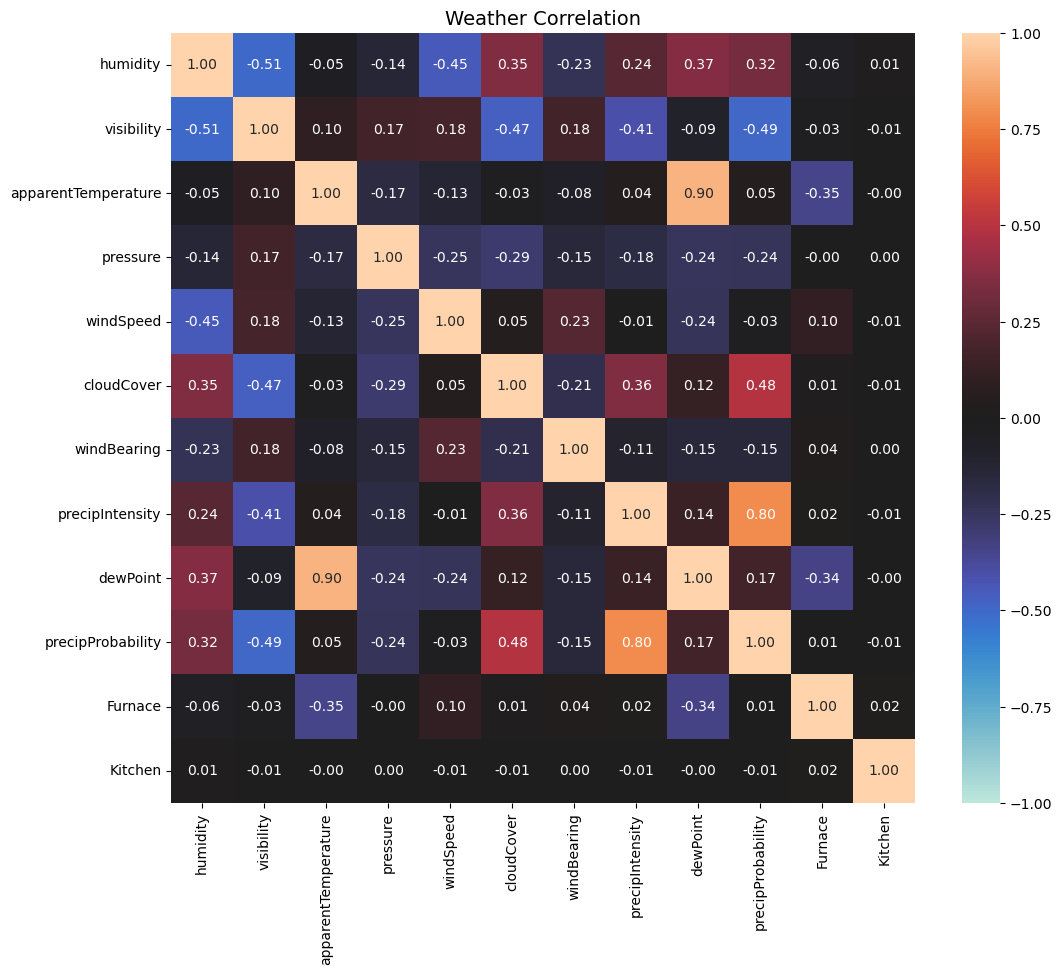

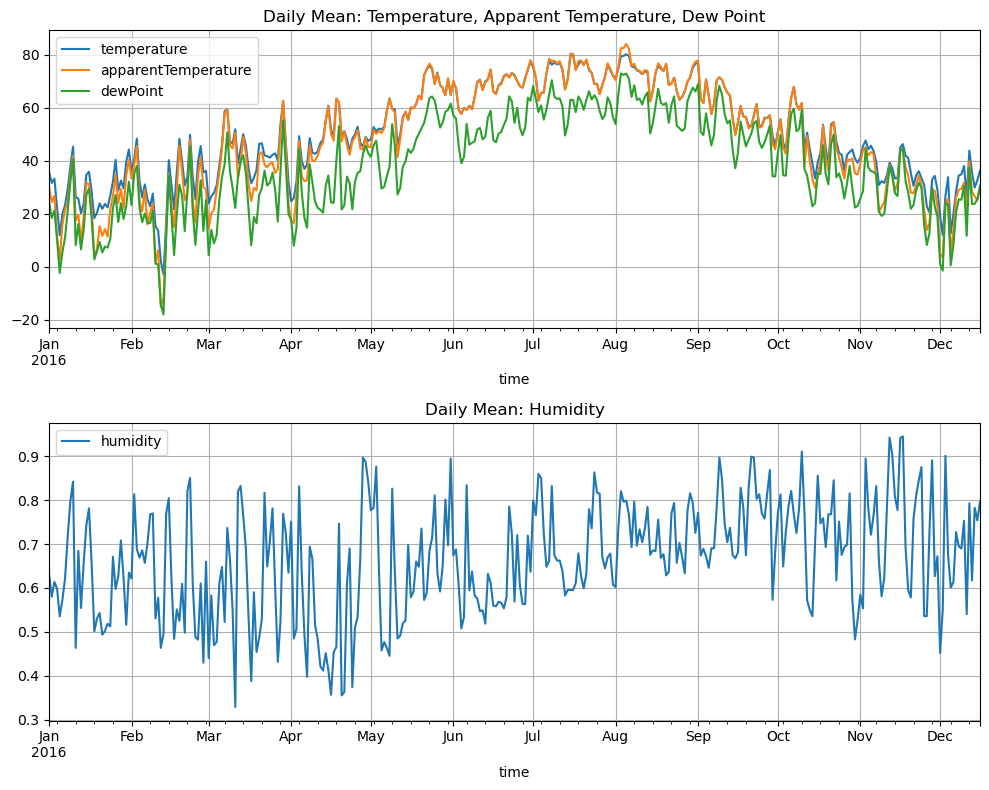

In [98]:
# Carte de chaleur des corrélations météorologiques
weather_columns = data.columns[13:].tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(data[weather_columns].corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Weather Correlation', fontsize=14)
plt.show()

# Visualisation des tendances météorologiques
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
data[['temperature', 'apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
axes[0].set_title('Daily Mean: Temperature, Apparent Temperature, Dew Point')
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)
axes[1].set_title('Daily Mean: Humidity')
plt.tight_layout()
plt.show()

### Étape 5 : Différence de température (Temperature Difference)

        Weather_Feature  Correlation_with_Tdiff
0              humidity                0.188441
1            visibility               -0.018984
2   apparentTemperature                0.807018
3              pressure               -0.029497
4             windSpeed               -0.465971
5            cloudCover               -0.012933
6           windBearing               -0.180131
7       precipIntensity                0.055953
8              dewPoint                0.753312
9     precipProbability                0.068525
10              Furnace               -0.315210
11              Kitchen                0.005570


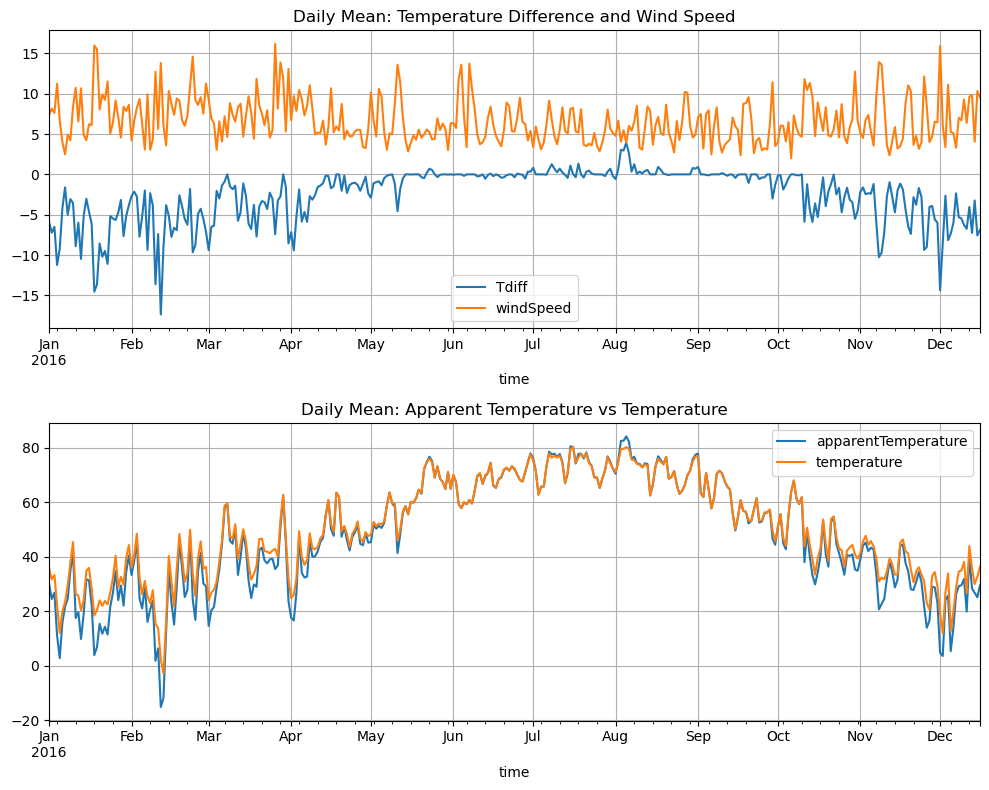

In [99]:
# Calcul et ajout de la colonne 'Tdiff'
data['Tdiff'] = data['apparentTemperature'] - data['temperature']

# Sélection et analyse des corrélations
clima = data.columns[13:-1].tolist()
lista_corr = []
for col in clima:
    corr = data['Tdiff'].corr(data[col])
    lista_corr.append(corr)
data_corr = pd.DataFrame({'Weather_Feature': clima, 'Correlation_with_Tdiff': lista_corr})
print(data_corr)

# Visualisation des tendances journalières
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
data[['Tdiff', 'windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
axes[0].set_title('Daily Mean: Temperature Difference and Wind Speed')
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)
axes[1].set_title('Daily Mean: Apparent Temperature vs Temperature')
plt.tight_layout()
plt.show()

### Étape 6 : Visualisations des données

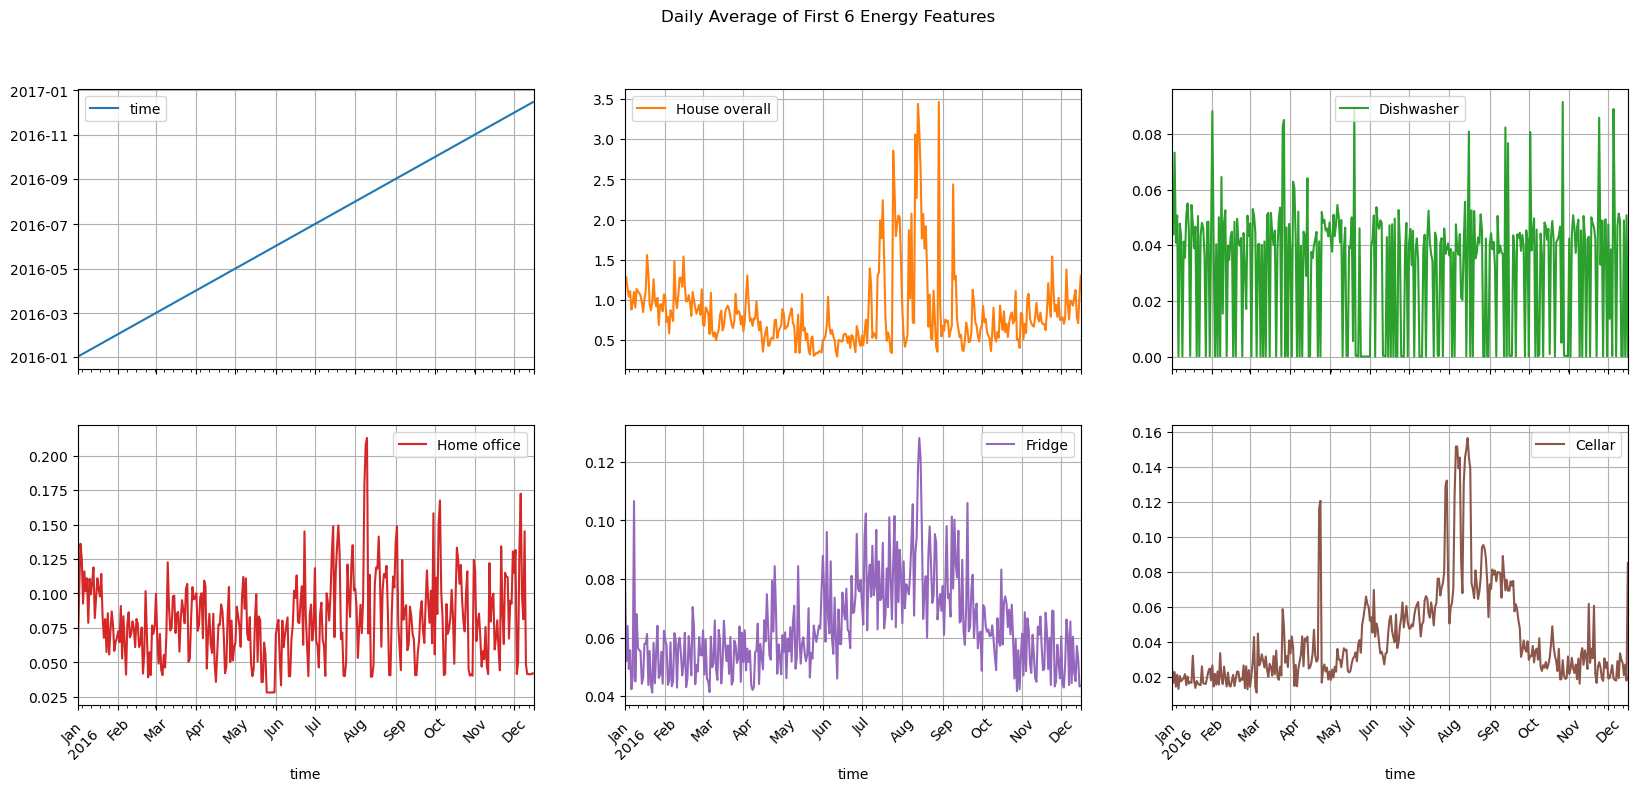

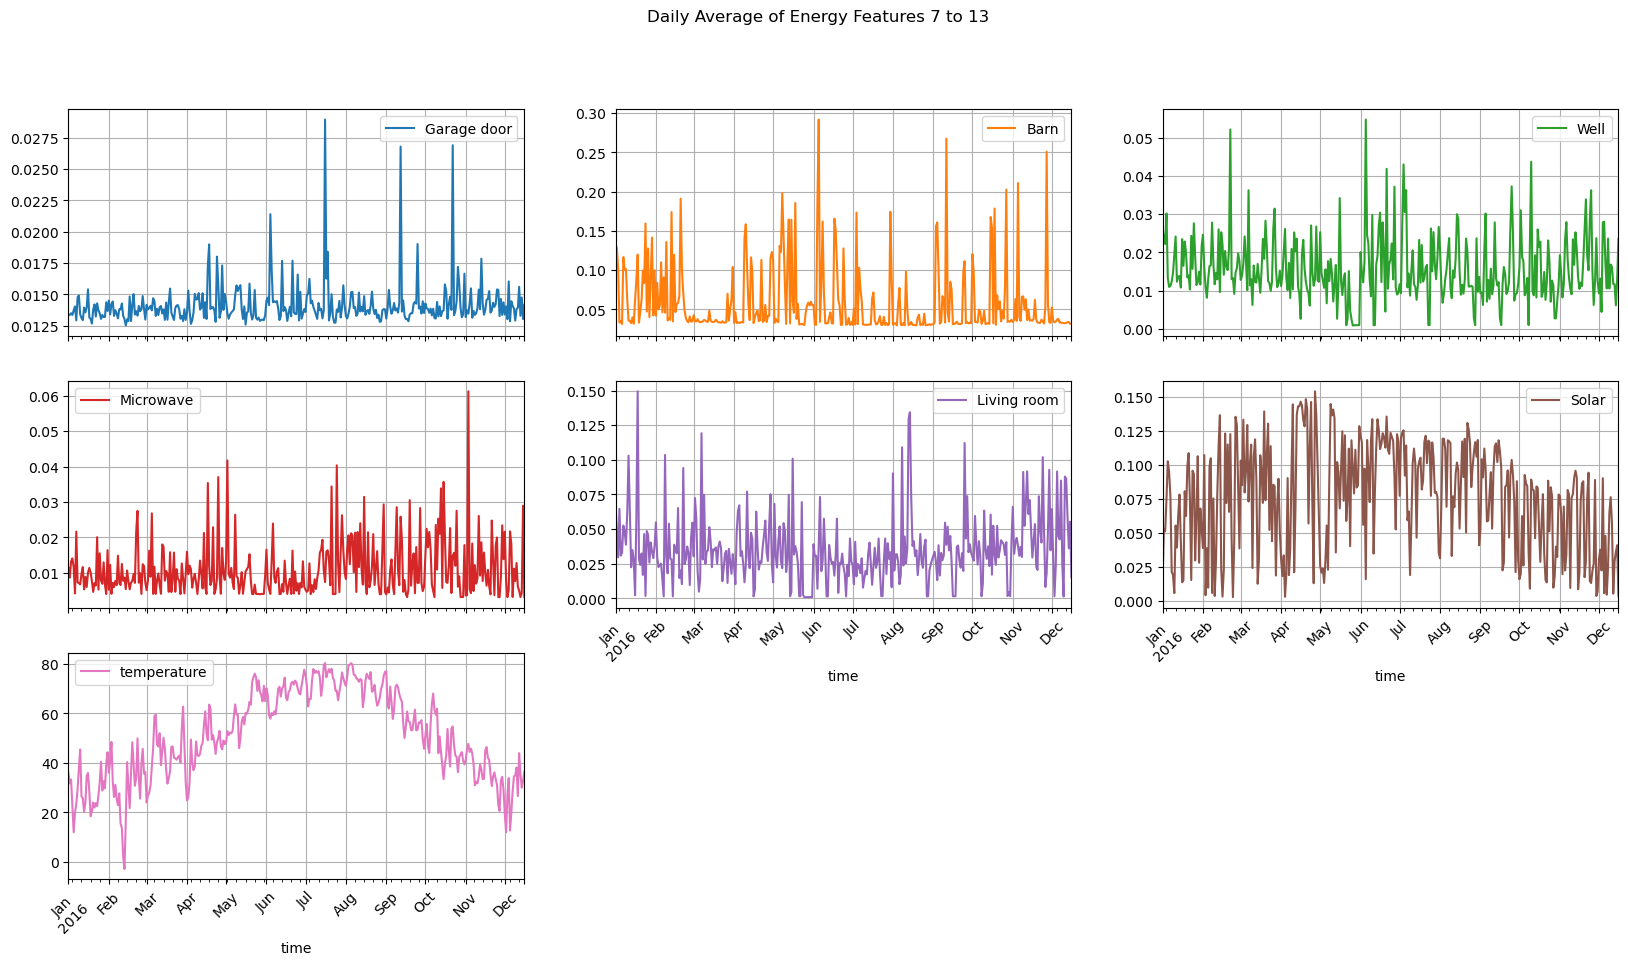

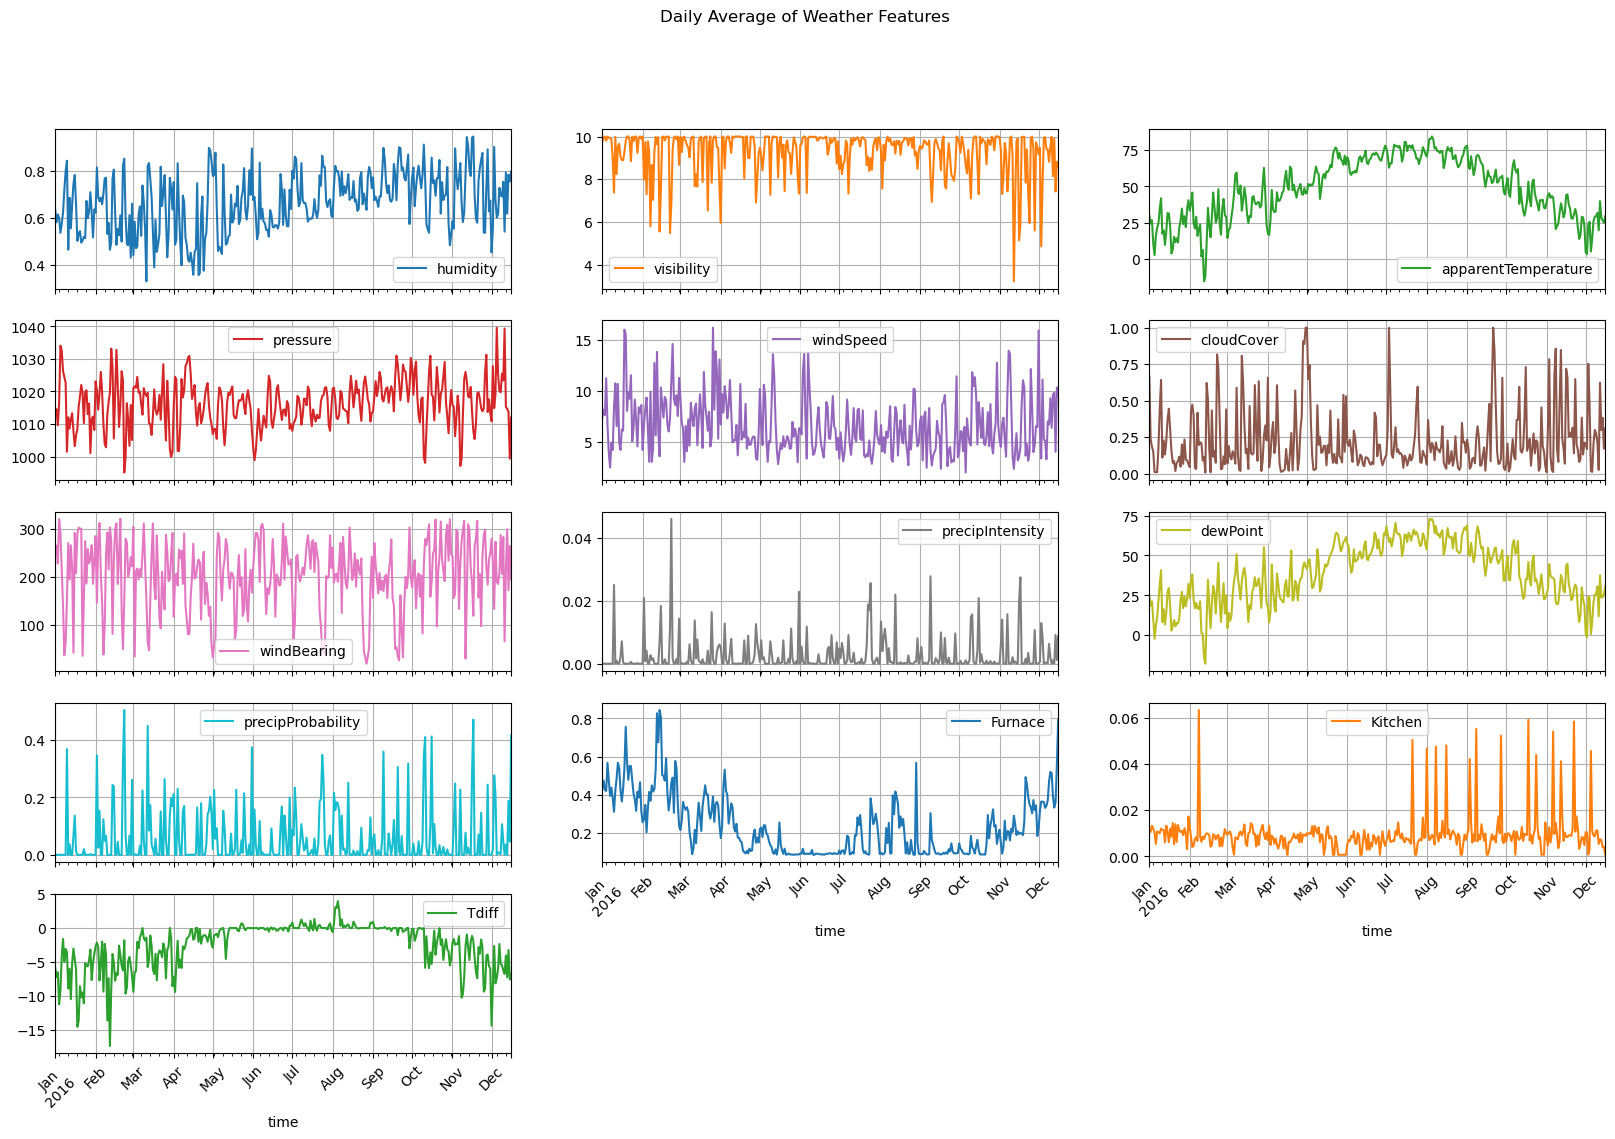

In [100]:
# Sélection et visualisation des données liées à l'énergie
energy_columns_1 = data.columns[0:6].tolist()
energy_data_1 = data[energy_columns_1].resample('D').mean()
energy_data_1.plot(subplots=True, layout=(-1, 3), figsize=(20, 8), grid=True, rot=45)
plt.suptitle('Daily Average of First 6 Energy Features')
plt.show()

# Sélection et visualisation des colonnes d'énergie restantes
energy_columns_2 = data.columns[6:13].tolist()
energy_data_2 = data[energy_columns_2].resample('D').mean()
energy_data_2.plot(subplots=True, layout=(-1, 3), figsize=(20, 10), grid=True, rot=45, xlabel=None)
plt.suptitle('Daily Average of Energy Features 7 to 13')
plt.show()

# Sélection et visualisation des données météorologiques
weather_columns = data.columns[13:].tolist()
weather_data = data[weather_columns].resample('D').mean()
weather_data.plot(subplots=True, layout=(-1, 3), figsize=(20, 12), grid=True, rot=45, xlabel=None)
plt.suptitle('Daily Average of Weather Features')
plt.show()

### Groupage de données

In [101]:
# Ajout de colonnes temporelles
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
data['minute'] = data.index.minute
print(data.head(2))

                                   time  House overall  Dishwasher  \
time                                                                 
2016-01-01 05:00:00 2016-01-01 05:00:00       0.932833    0.000033   
2016-01-01 05:01:00 2016-01-01 05:01:00       0.934333    0.000000   

                     Home office   Fridge    Cellar  Garage door     Barn  \
time                                                                        
2016-01-01 05:00:00     0.442633  0.12415  0.006983     0.013083  0.03135   
2016-01-01 05:01:00     0.444067  0.12400  0.006983     0.013117  0.03150   

                         Well  Microwave  Living room     Solar  temperature  \
time                                                                           
2016-01-01 05:00:00  0.001017   0.004067     0.001517  0.003483        36.14   
2016-01-01 05:01:00  0.001017   0.004067     0.001650  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time         

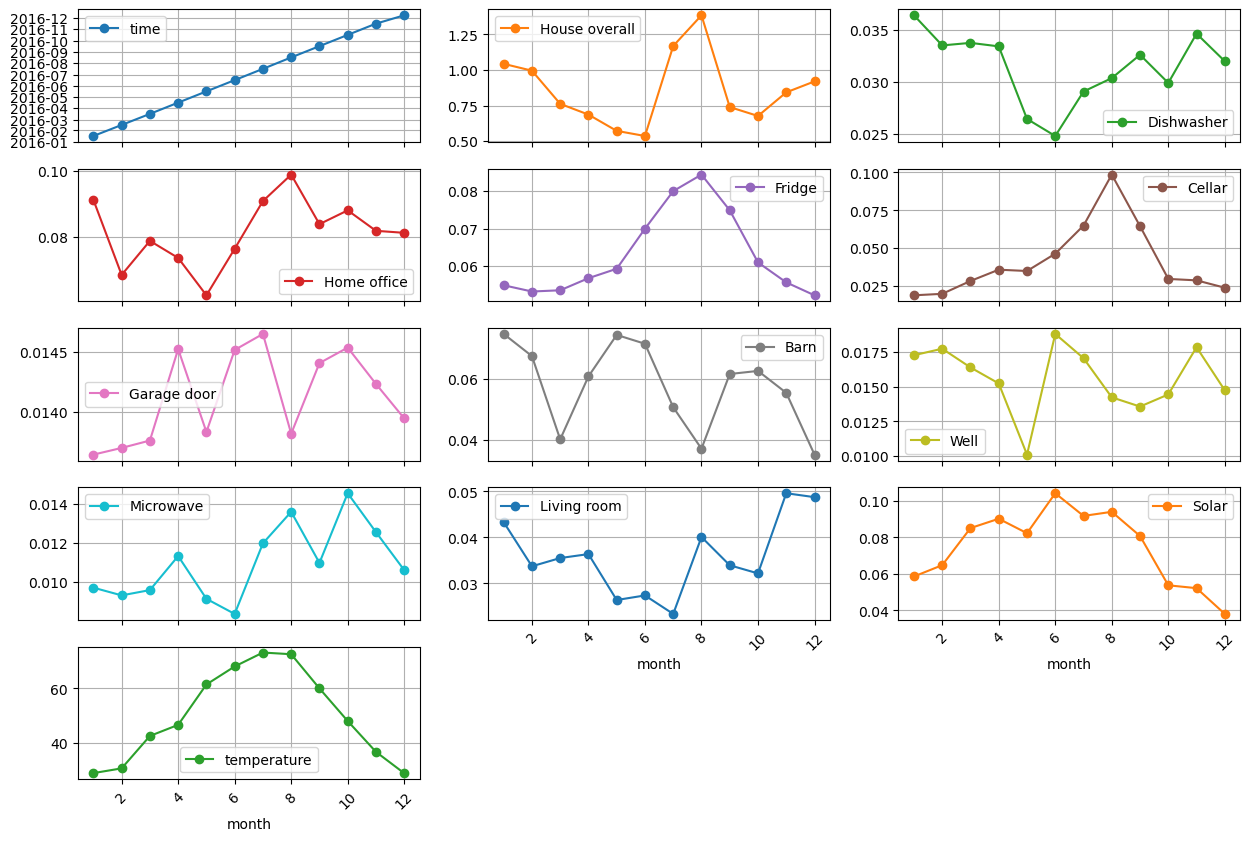

In [102]:

# Groupage des données par mois
mean_month = data.groupby('month').agg({col: 'mean' for col in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10), grid=True, rot=45, xlabel=None, marker='o')
plt.show()


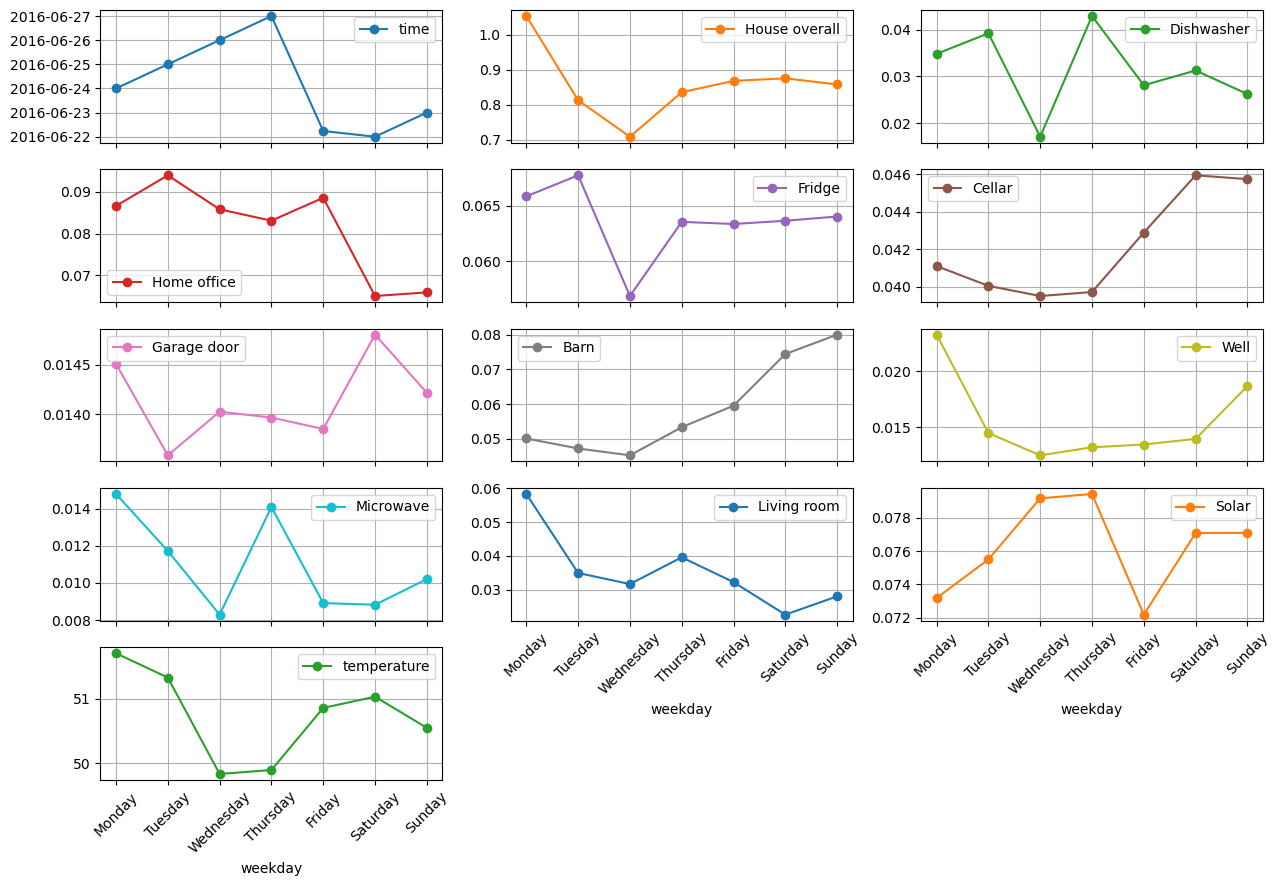

In [103]:
# Groupage des données par jour de la semaine
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').mean().reindex([0, 1, 2, 3, 4, 5, 6])
mean_weekday.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)
mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10), grid=True, rot=45, xlabel=None, marker='o')
plt.show()


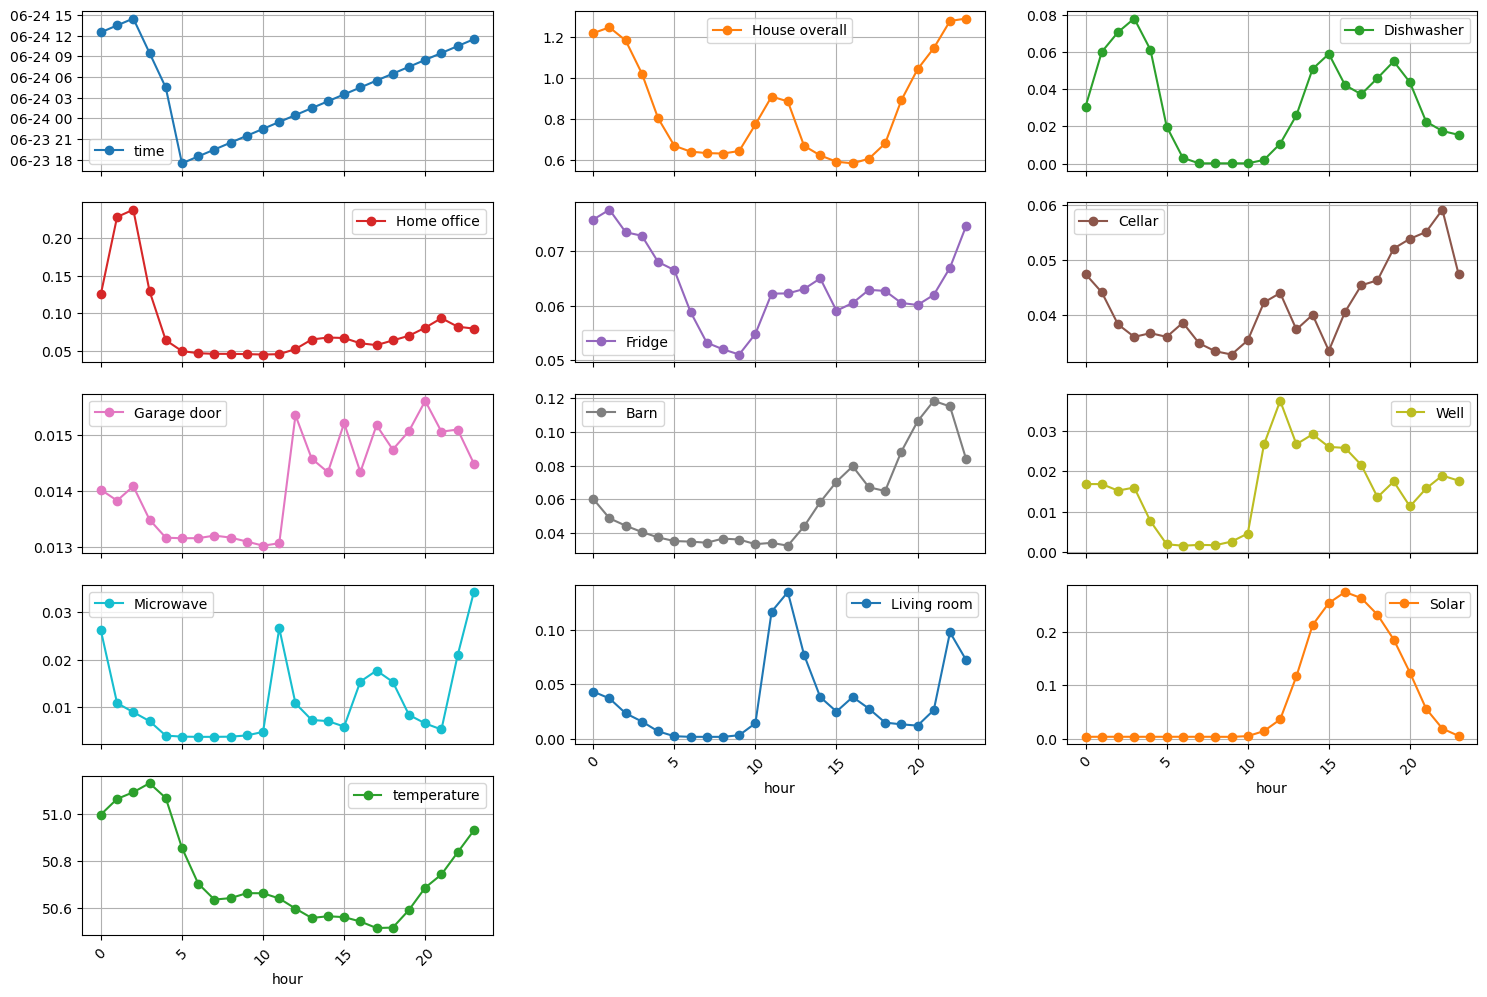

In [104]:

# Groupage des données par heure
mean_hour = data.groupby('hour').mean()
mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12), grid=True, rot=45, xlabel=None, marker='o')
plt.show()

### Corrélations entre l'énergie et la météo

In [105]:
#data.drop(['use', 'gen'], axis=1, inplace=True)

In [106]:
import pandas as pd

# Supposons que votre DataFrame 'data' soit déjà chargé avec vos données.

# 8.1 Création des listes de colonnes
consumtions = data.columns[0:13].tolist()  # Colonnes liées à la consommation d'énergie
weather = data.columns[13:-5].tolist()  # Colonnes météorologiques

# 8.2 Calcul des corrélations
lists = [consumtions,]  # Initialisation de la liste lists avec consumtions comme premier élément

# Calcul des corrélations
for consumtion_col in consumtions:
    correlations = []
    for weather_col in weather:
        # Calcul de la corrélation entre chaque colonne de consommation et chaque colonne météo
        corr_value = data[consumtion_col].corr(data[weather_col])
        correlations.append(corr_value)
    # Ajout des corrélations à la liste
    lists.append(correlations)

# 8.3 Création et conversion du DataFrame
# Création du DataFrame avec consumtions comme index et des noms de colonnes appropriés
dataframe_corr = pd.DataFrame(lists[1:], index=consumtions, columns=weather)

# Conversion des valeurs du DataFrame en type float
dataframe_corr = dataframe_corr.astype(float)

# 8.4 Application de la méthode style pour la mise en surbrillance
styled_corr = dataframe_corr.style.applymap(lambda x: 'background-color: red' if x > 0.1 
                              else ('background-color: orange' if x < -0.1 else 'background-color: white'))

# Affichez le DataFrame stylisé
styled_corr


### Ajout de colonnes et création des graphiques

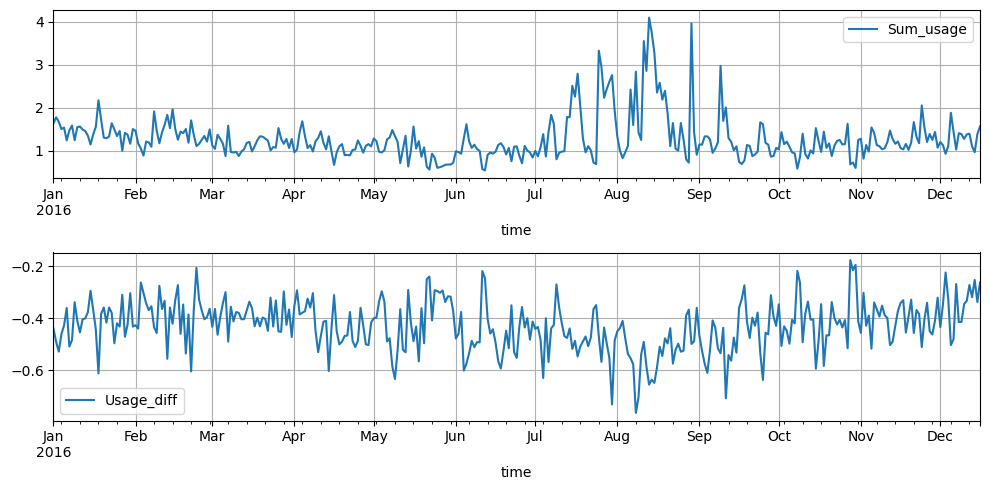

In [107]:
# Ajout de colonnes
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data['Usage_diff'] = data['House overall'] - data['Sum_usage']

# Création des sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
data['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
data['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)
plt.tight_layout()
plt.show()

### Questions d'analyse
Analyse des tendances énergétiques :

Les variations notables dans les courbes des premières six colonnes d'énergie peuvent être liées aux habitudes de consommation et aux conditions environnementales.
Observations sur les colonnes restantes de l'énergie :

Les différences entre les premières six colonnes et les autres colonnes d'énergie peuvent indiquer des usages spécifiques d'équipements.
Comparaison entre énergie et météo :

Il existe des corrélations observables entre certaines colonnes météorologiques (comme la température) et les données énergétiques.

### Baseline Model

### 9 Échantillonnage et moyenne mobile

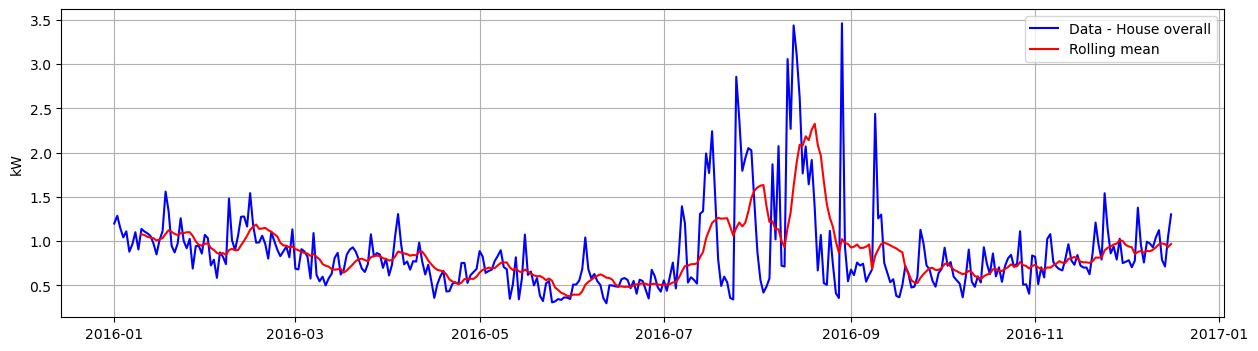

In [108]:
data_daily = data['House overall'].resample('D').mean()
baseline = data_daily.rolling(window=10).mean()
plt.figure(figsize=(15, 4))
plt.plot(data_daily, c='blue', label='Data - House overall')
plt.plot(baseline, c='red', label='Rolling mean')
plt.legend()
plt.ylabel('kW')
plt.grid()
plt.show()

### 10. Évaluation d'une moyenne mobile comme modèle prédictif10. Évaluation d'une moyenne mobile comme modèle prédictif

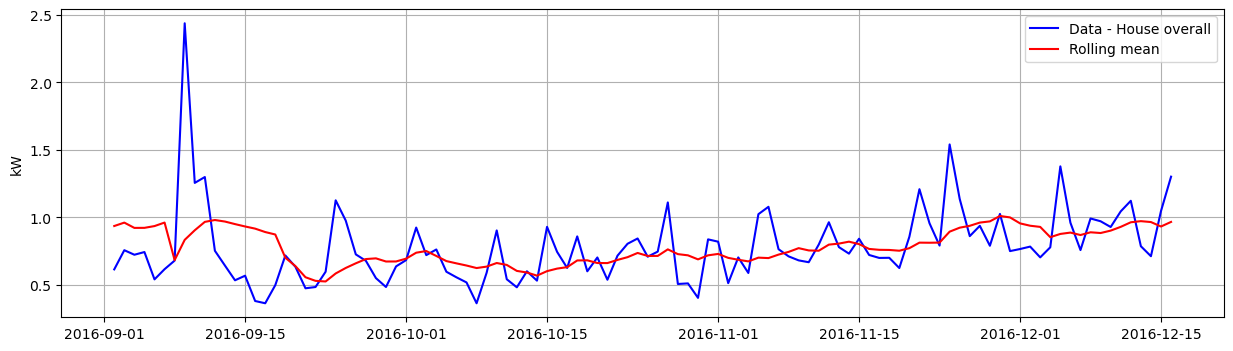

MSE: 0.071
RMSE: 0.266
MAE: 0.177
MAPE: 0.236
MASE: 0.721
R² score: 0.077


In [109]:
size = int(len(data_daily) * 0.7)
train = data_daily[:size]
test = data_daily[size:]

baseline_test = baseline.loc[test.index[0]:]

plt.figure(figsize=(15, 4))
plt.plot(test, c='blue', label='Data - House overall')
plt.plot(baseline_test, c='red', label='Rolling mean')
plt.legend()
plt.ylabel('kW')
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(test, baseline_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test) / np.abs(test))
MASE = np.mean(np.abs(test - baseline_test)) / (np.abs(np.diff(train)).sum() / (len(train) - 1))
R2 = r2_score(test, baseline_test)

print(f'MSE: {MSE:.3f}')
print(f'RMSE: {RMSE:.3f}')
print(f'MAE: {MAE:.3f}')
print(f'MAPE: {MAPE:.3f}')
print(f'MASE: {MASE:.3f}')
print(f'R² score: {R2:.3f}')


### 11. Algorithme de persistance pour la prédiction

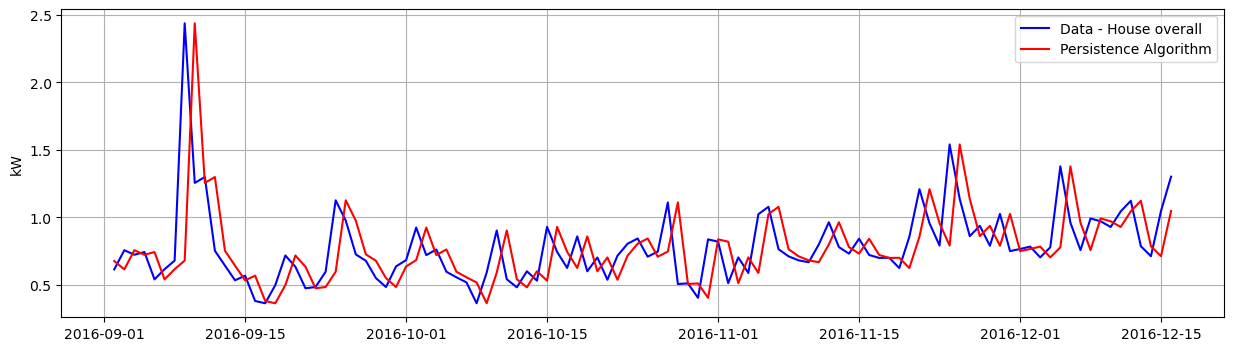

RMSE: 0.304
MAE: 0.194
MAPE: 0.233
MASE: 0.790
R² score: -0.203


In [110]:
baseline = data_daily.shift(1)
baseline = baseline.dropna()

data_actual = data_daily.iloc[1:]

size = int(len(data_actual) * 0.7)
train = data_actual[:size]
test = data_actual[size:]


baseline_test = baseline.loc[test.index[0]:]

plt.figure(figsize=(15, 4))
plt.plot(test, c='blue', label='Data - House overall')
plt.plot(baseline_test, c='red', label='Persistence Algorithm')
plt.legend()
plt.ylabel('kW')
plt.grid()
plt.show()


RMSE = np.sqrt(mean_squared_error(test, baseline_test))

MAE = mean_absolute_error(test, baseline_test)

MAPE = np.mean(np.abs(baseline_test - test) / np.abs(test))

MASE = np.mean(np.abs(test - baseline_test)) / (np.abs(np.diff(train)).sum() / (len(train) - 1))


R2 = r2_score(test, baseline_test)

print(f'RMSE: {RMSE:.3f}')
print(f'MAE: {MAE:.3f}')
print(f'MAPE: {MAPE:.3f}')
print(f'MASE: {MASE:.3f}')
print(f'R² score: {R2:.3f}')


### ARRIMA

### 12. Analyse de la moyenne mobile et de l'écart type pour une série temporelle

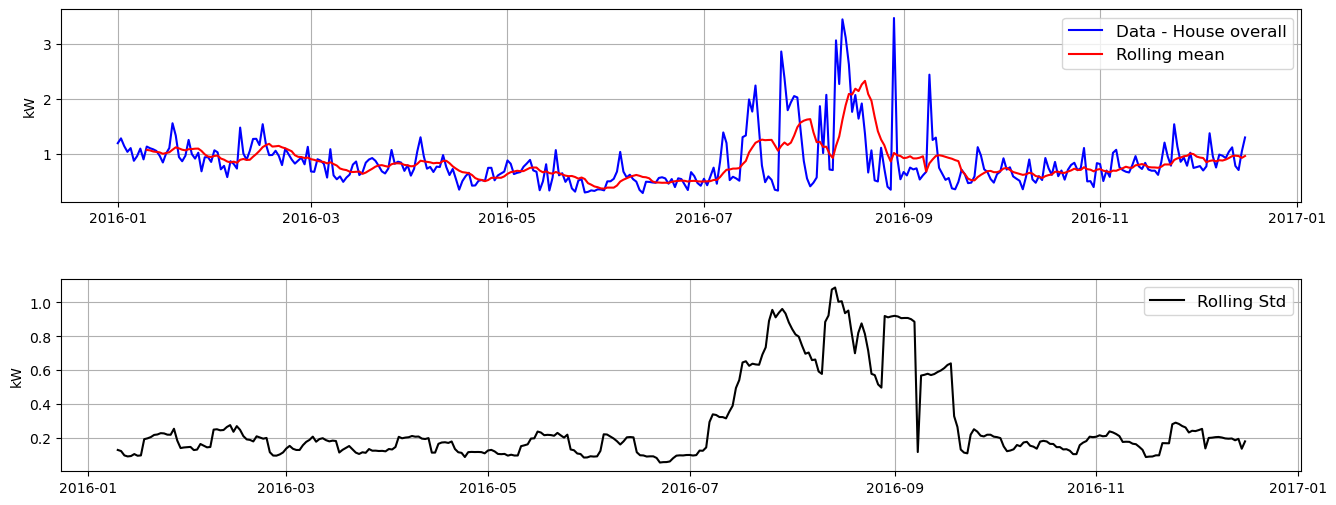

In [111]:
ata_daily = data['House overall'].resample('D').mean()

rollingMEAN = data_daily.rolling(window=10).mean()

rollingSTD = data_daily.rolling(window=10).std()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))
plt.subplots_adjust(hspace=0.4)

ax1.plot(data_daily, c='blue', label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax1.legend(fontsize=12)
ax1.set_ylabel('kW')
ax1.grid()

ax2.plot(rollingSTD, c='black', label='Rolling Std')
ax2.legend(fontsize=12)
ax2.set_ylabel('kW')
ax2.grid()

plt.show()

### 13.Test de stationnarité avec Dickey-Fuller

In [112]:
from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in resultDFtest[4].items():
    Out['Critical Value (%s)' % key] = value

print('DICK-FULLER RESULTS: \n\n{}'.format(Out))

DICK-FULLER RESULTS: 

Test Statistic                  -2.988003
p-value                          0.036030
#Lags Used                      10.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


### 14. Analyse des autocorrélations et des différenciations


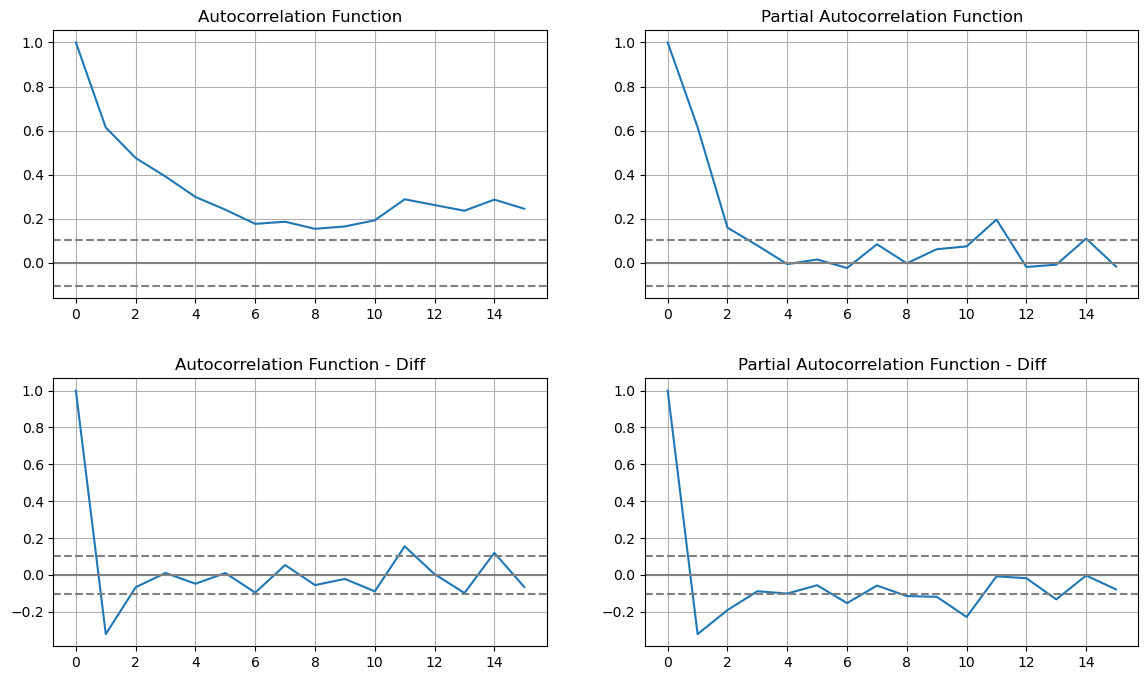

In [113]:
data_daily_diff = data_daily - data_daily.shift(1)
data_daily_diff = data_daily_diff.dropna()

from statsmodels.tsa.stattools import acf, pacf

ACF = acf(data_daily, nlags=15)
PACF = pacf(data_daily, nlags=15, method='ols')

ACF1 = acf(data_daily_diff, nlags=15)
PACF1 = pacf(data_daily_diff, nlags=15, method='ols')
def plots_corr(ax, func, dat, title):
    ax.plot(func)
    ax.axhline(y=0, linestyle='-', c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(dat)), linestyle='--', c='gray')
    ax.axhline(y=1.96/np.sqrt(len(dat)), linestyle='--', c='gray')
    ax.grid()
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.3)

plots_corr(ax1, ACF, data_daily, 'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily, 'Partial Autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff, 'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff, 'Partial Autocorrelation Function - Diff')

plt.show()


## Training

In [114]:
# Diviser la série temporelle en ensembles d'entraînement (70%) et de test (30%)
size = int(len(data_daily) * 0.7)
train = data_daily[:size]
test = data_daily[size:]
# Acher le nombre total de points dans la série, l'ensemble d'entraînement et l'ensemble de test
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 351
Number of points in train: 245
Number of points in test: 106


In [115]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [116]:
model = ARIMA(train, order=(2,1,1))

In [117]:
model_fit = model.fit()

In [118]:
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  258.4623694205453


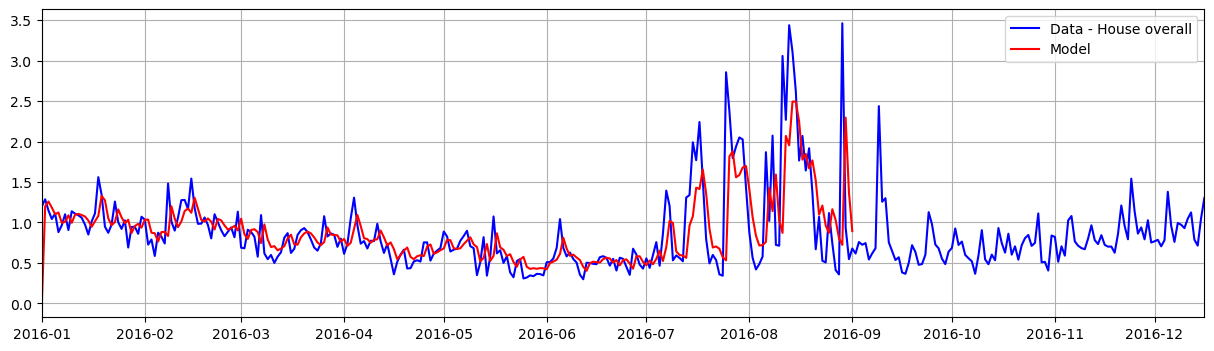

In [119]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue', label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='Model')
plt.legend()
plt.grid()
plt.margins(x=0)
plt.show()

In [120]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  245
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -125.231
Date:                Thu, 12 Dec 2024   AIC                            258.462
Time:                        23:24:38   BIC                            272.451
Sample:                    01-01-2016   HQIC                           264.096
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4590      0.051      9.051      0.000       0.360       0.558
ar.L2          0.0999      0.037      2.667      0.008       0.026       0.173
ma.L1         -0.9438      0.026    -35.670      0.0

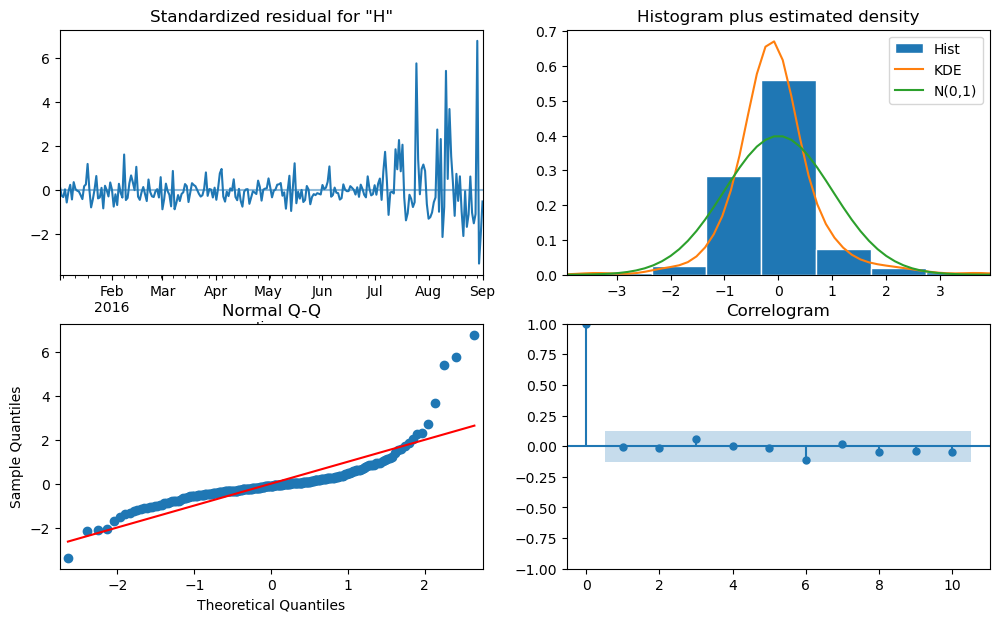

In [121]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

In [122]:
new_fit = model_fit.append(data_daily[size:size+1], refit=False)

In [123]:
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)

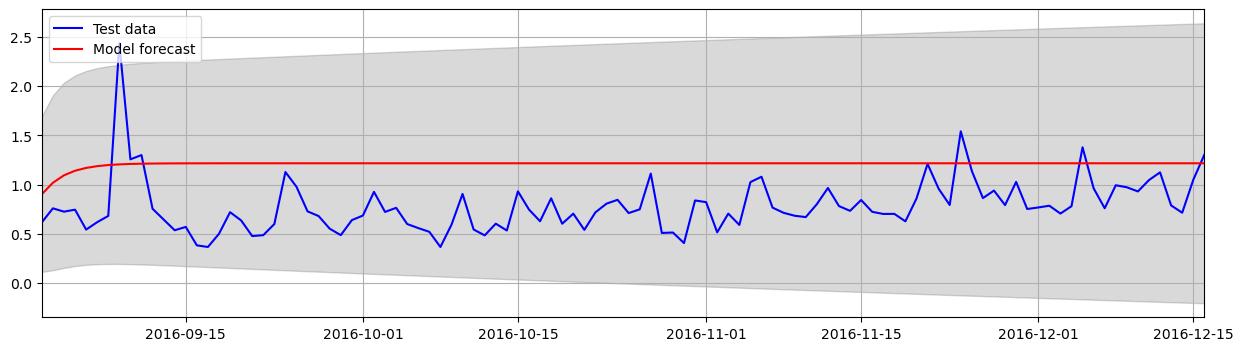

In [124]:
plt.figure(figsize=(15,4))
plt.plot(test, c='blue', label='Test data')
plt.plot(forecast, c='red', label='Model forecast')
plt.fill_between(confidence.index, confidence['lower House overall'], confidence['upper House overall'], color='k', alpha=0.15)
plt.legend()
plt.grid()
plt.margins(x=0)
plt.show()

In [125]:
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test) / np.abs(test))
MASE = np.mean(np.abs(test - forecast)) / (np.abs(np.diff(train)).sum() / (len(train) - 1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' % MAPE)
print('MASE: %.3f' % MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

MSE: 0.259
RMSE: 0.509
MAE: 0.463
MAPE: 0.722
MASE: 1.886
R^2 score: -2.379


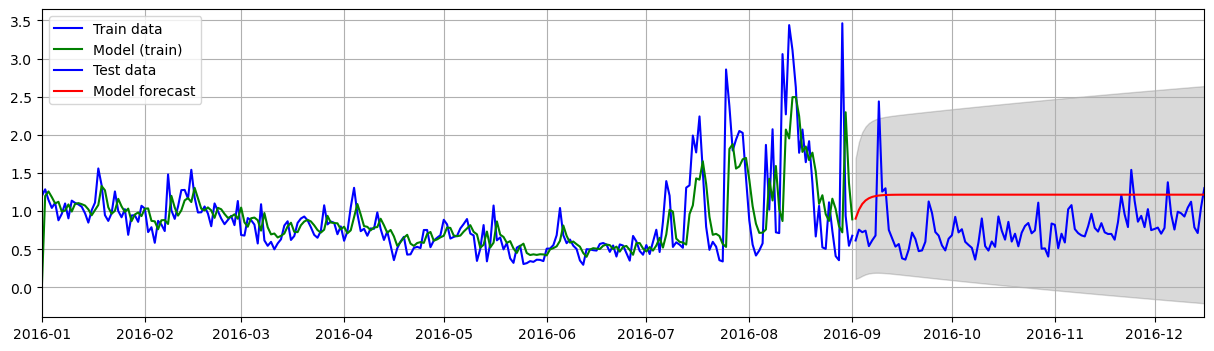

In [126]:
plt.figure(figsize=(15,4))
plt.plot(train, c='blue', label='Train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='Model (train)')
plt.plot(test, c='blue', label='Test data')
plt.plot(forecast, c='red', label='Model forecast')
plt.fill_between(confidence.index, confidence['lower House overall'], confidence['upper House overall'], color='k', alpha=0.15)
plt.legend()
plt.grid()
plt.margins(x=0)
plt.show()

### 1. Diviser les données en ensembles d'entraînement et de test :

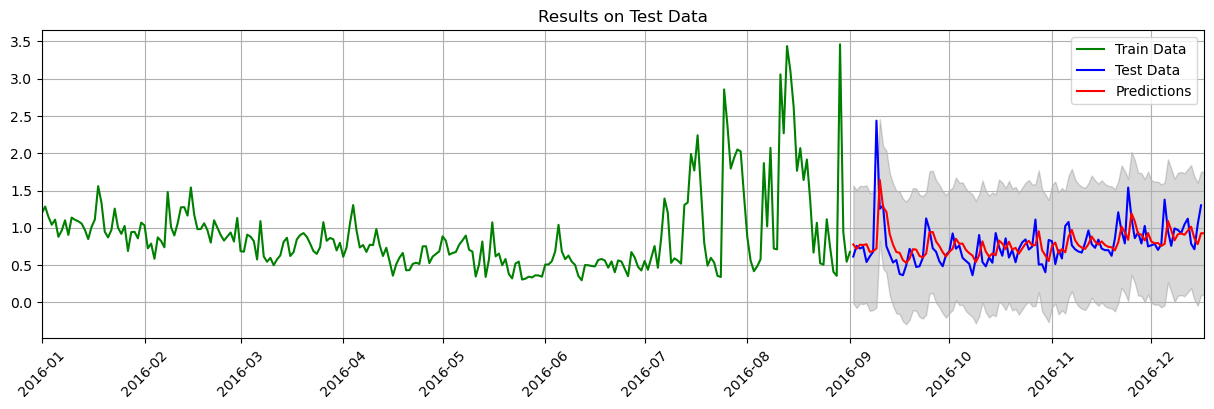

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Définir n pour le nombre de prédictions à faire à chaque itération
n = 1  # Par exemple, prédire 10 valeurs à chaque itération

# Séparer les données en entraînement et test
X = data_daily.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:]

history = [x for x in train]
predictions = []
confidence = []

# Effectuer les prévisions
for t in range(0, len(test), n):
    model = ARIMA(history, order=(2, 0, 1))
    model_fit = model.fit()
    output = model_fit.forecast(n).tolist()
    conf = model_fit.get_forecast(n).conf_int(0.05)
    
    predictions.extend(output)
    confidence.extend(conf)
    
    obs = test.tolist()[t:t+n]
    history = history[n:]
    history.extend(obs)

#
output = model_fit.forecast(n).tolist()
conf = model_fit.get_forecast(n).conf_int(0.05)
predictions.extend(output)
confidence.extend(conf)
#5
obs = test.tolist()[t:t+n]
history = history[n:]
history.extend(obs)
# 6. Rassembler les résultats des prévisions
conf_int = np.vstack(confidence)

# 16. Comparaison des données d'entraînement avec les données Test
m = len(predictions) - len(test)
index_extended = data_daily[size:].index.union(data_daily[size:].index.shift(m)[-(m):])
predictions_series = pd.Series(predictions, index=index_extended)
confidence_df = pd.DataFrame(conf_int, columns=['lower', 'upper'], index=index_extended)

# Tracer les prévisions par rapport aux résultats réels
plt.figure(figsize=(15, 4))
plt.plot(data_daily[:size], c='green', label='Train Data')
plt.plot(data_daily[size:], c='blue', label='Test Data')
plt.plot(predictions_series, c='red', label='Predictions')
plt.fill_between(predictions_series.index, confidence_df['lower'], confidence_df['upper'], color='k', alpha=.15)
plt.legend()
plt.grid()
plt.margins(x=0)
plt.title('Results on Test Data')
plt.xticks(rotation=45)
plt.show()



In [128]:
# 7. Évaluer les prévisions

print('MSE: %.5f' % (mean_squared_error(test, predictions[:len(test)])))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions[:len(test)])))
MAE = mean_absolute_error(test, predictions[:len(test)])
MAPE = np.mean(np.abs(predictions[:len(test)] - test)/np.abs(test))
MASE = np.mean(np.abs(test - 
predictions[:len(test)]))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, predictions[:len(test)]))

MSE: 0.06930
RMSE: 0.263
MAE: 0.174
MAPE: 0.226
MASE: 0.710
R^2 score: 0.095


### LSTM

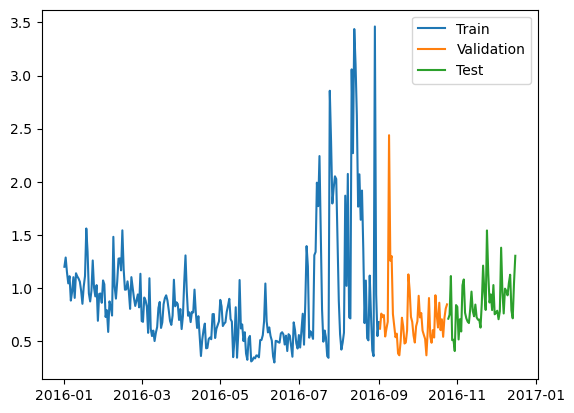

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'data_daily' est votre série temporelle de données
# Par exemple, data_daily = np.array([...])

# 1. Fonction de préparation des séquences
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence) - 1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

# 2. Fonctions de normalisation
def MinMaxScale(t, t_or):
    return (t - t_or.min()) / (t_or.max() - t_or.min())

def InverseMinMaxScale(t, t_or):
    return t * (t_or.max() - t_or.min()) + t_or.min()

# 3. Préparation des données avec la fonction 'sampling'
n_steps = 10  # Nombre d'étapes à utiliser pour prédire
X, Y = sampling(data_daily, n_steps)

# 4. Division des données
size = int(len(data_daily)*0.7)
size2 = int(((len(data_daily)-size)/2)+size)

X_train, Y_train = X[:size], Y[:size]
X_val, Y_val = X[size:size2], Y[size:size2]
X_test, Y_test = X[size2:], Y[size2:]

# 5. Redimensionnement des données pour le modèle LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 6. Visualisation des ensembles de données
plt.plot(data_daily[:size], label='Train')
plt.plot(data_daily[size:size2], label='Validation')
plt.plot(data_daily[size2:], label='Test')
plt.legend()
plt.show()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Train MSE minimum: 0.034813262840691195
Validation MSE minimum: 0.04420080454632313


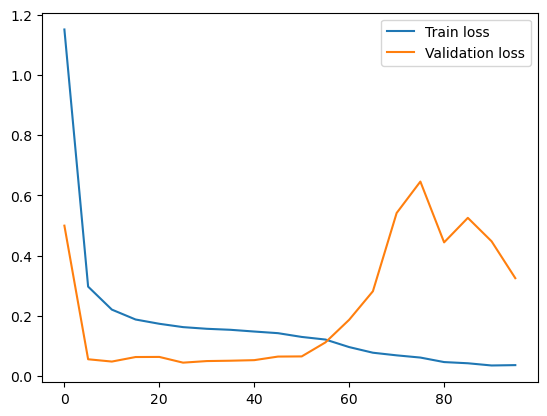

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Supposons que X_train, Y_train, X_val, Y_val sont déjà définis.
# Définir n_steps et n_features en fonction des données d'entrée
n_features = 1  # Nombre de caractéristiques

# 1. Création du modèle LSTM avec Keras
model = Sequential()

# 2. Ajout d'une couche LSTM
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))

# 3. Ajout d'une couche Dense
model.add(Dense(1))

# 4. Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# 5. Résumé du modèle
model.summary()

# 6. Initialisation des listes pour stocker les erreurs
mse_train = list()
mse_val = list()

# 7. Boucle à travers les différentes époques
for epoch in range(0, 100, 5):
    # 8. Entraînement du modèle pour chaque époque
    model_fit = model.fit(X_train, Y_train, epochs=epoch, verbose=0)
    
    # 9. Prédictions sur les ensembles d'entraînement et de validation
    Train_pred = model.predict(X_train, verbose=0)
    Val_pred = model.predict(X_val, verbose=0)
    
    # 10. Calcul des erreurs quadratiques moyennes (MSE)
    mse_t = mean_squared_error(Train_pred, Y_train)
    mse_v = mean_squared_error(Val_pred, Y_val)
    
    # 11. Ajout des MSE dans les listes
    mse_train.append(mse_t)
    mse_val.append(mse_v)

# 12. Visualisation de la perte d'entraînement et de validation
plt.plot(range(0, 100, 5), mse_train, label='Train loss')
plt.plot(range(0, 100, 5), mse_val, label='Validation loss')
plt.legend()

# Affichage des MSE minimum
print('Train MSE minimum:', min(mse_train))
print('Validation MSE minimum:', min(mse_val))

plt.show()


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - loss: 0.0560
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0492
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0414
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0362
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0192
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0203
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0198
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0212
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0216
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0184
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0145
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0228
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0148
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0155
Epoch 16/200
8/8 ━

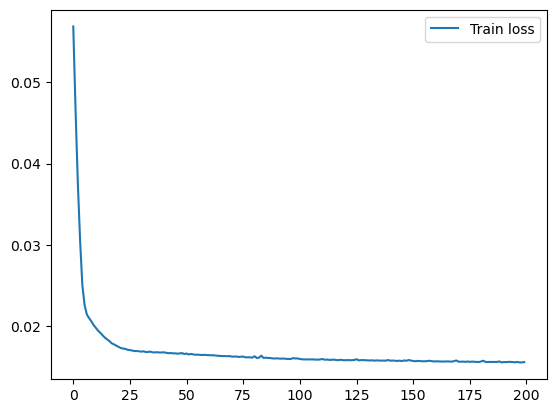

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Définir le nombre de pas temporels
n_steps = 2

# Supposons que `sampling` est une fonction déjà définie pour diviser les données en X et Y
# Diviser les données en sous-séquences d'entrée (X) et de sortie (Y)
X, Y = sampling(data_daily.tolist(), n_steps)

# Reshaper les données pour que l'entrée corresponde à la forme attendue par LSTM (n_samples, n_steps, n_features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 1 pour n_features, une seule caractéristique

# Diviser les données en ensembles d'entraînement et de test (70% pour l'entraînement, 30% pour le test)
size = int(len(data_daily) * 0.7)
X_train_or, Y_train_or = X[:size], Y[:size]
X_test_or, Y_test_or = X[size:], Y[size:]

# Normaliser les données
X_train = MinMaxScale(X_train_or, data_daily)
Y_train = MinMaxScale(Y_train_or, data_daily)
X_test = MinMaxScale(X_test_or, data_daily)
Y_test = MinMaxScale(Y_test_or, data_daily)

# Définir le nombre de caractéristiques (n_features)
n_features = 1  # Une seule caractéristique ici

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))  # Couche LSTM
model.add(Dense(1))  # Couche de sortie

# Compiler le modèle avec l'optimiseur Adam et la perte MSE
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle pendant 200 époques
model_fit = model.fit(X_train, Y_train, epochs=200, verbose=1)

# Prédictions sur les ensembles d'entraînement et de test
Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)

# Calcul de l'erreur quadratique moyenne (MSE)
print('MSE Train:', mean_squared_error(Train_pred, Y_train))  # MSE sur l'entraînement
print('MSE Test:', mean_squared_error(Y_pred, Y_test))  # MSE sur le test

# Tracer la courbe de perte d'entraînement
plt.plot(model_fit.history['loss'], label='Train loss')

# (Optionnel) Tracer la courbe de perte de validation si elle est activée
# plt.plot(model_fit.history['val_loss'], label='Validation loss')

# Ajouter une légende
plt.legend()

# Afficher la valeur minimale de la perte d'entraînement (MSE)
print('Train MSE minimum:', min(model_fit.history['loss']))
# (Optionnel) Afficher la valeur minimale de la perte de validation
# print('Validation MSE minimum:', min(model_fit.history['val_loss']))

# Afficher la courbe
plt.show()


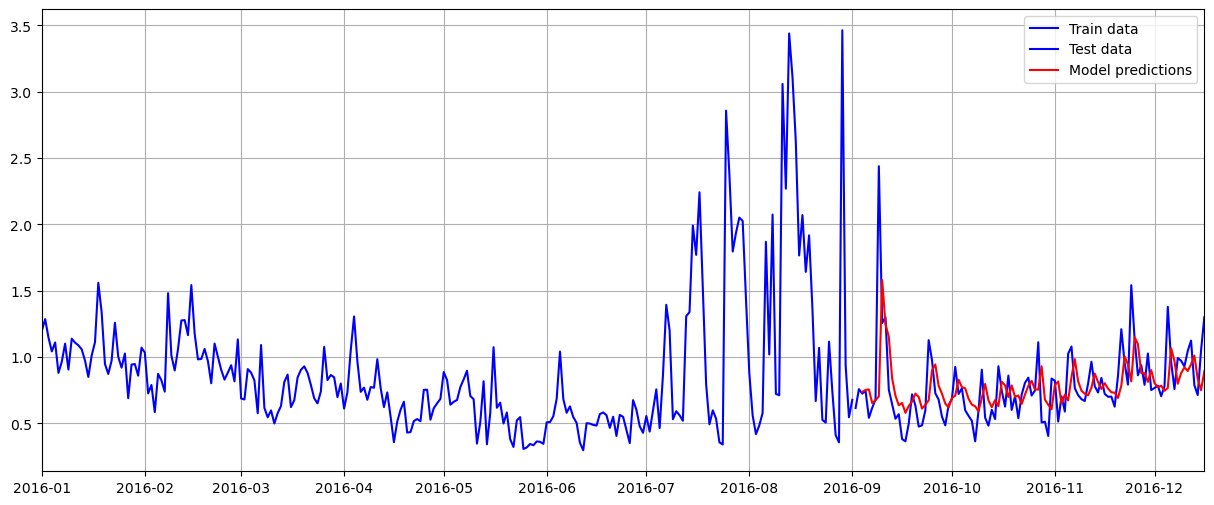

MSE: 0.06899
RMSE: 0.26265
MAE: 0.170
MAPE: 0.299
R^2 score: 0.113


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Supposons que InverseMinMaxScale est une fonction déjà définie pour restaurer l'échelle d'origine
# Restauration des prédictions à l'échelle d'origine
Y_pred = InverseMinMaxScale(Y_pred, data_daily)

# Conversion des prédictions en séries temporelles
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily[size + n_steps:].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily[:size].index)

# Tracer les données réelles et les prédictions du modèle
plt.figure(figsize=(15, 6))
plt.plot(data_daily[:size], c='blue', label='Train data')  # Données d'entraînement
# plt.plot(Train_pred_series, c='green', label='Train predictions')  # Commenté : ajouter la courbe des prédictions d'entraînement si nécessaire
plt.plot(data_daily[size:], c='blue', label='Test data')  # Données de test
plt.plot(Y_pred_series, c='red', label='Model predictions')  # Prédictions du modèle
plt.legend()
plt.grid(True)
plt.margins(x=0)

# Afficher la courbe
plt.show()

# Calcul du MSE (Mean Squared Error)
print('MSE: %.5f' % mean_squared_error(Y_pred, Y_test_or))

# Calcul du RMSE (Root Mean Squared Error)
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test_or)))

# Calcul du MAE (Mean Absolute Error)
MAE = mean_absolute_error(Y_test_or, Y_pred)
print('MAE: %.3f' % MAE)

# Calcul du MAPE (Mean Absolute Percentage Error)
MAPE = np.mean(np.abs(Y_pred - Y_test_or) / np.abs(Y_test_or))
print('MAPE: %.3f' % MAPE)

# MASE (Mean Absolute Scaled Error) est commenté ici mais peut être ajouté si nécessaire
# MASE = np.mean(np.abs(Y_test - Y_pred)) / (np.abs(np.diff(X_train)).sum() / (len(X_train) - 1))
# print('MASE: %.3f' % MASE)

# Calcul du R² (coefficient de détermination)
print('R^2 score: %.3f' % r2_score(Y_test_or, Y_pred))
